# The goal of this project is to predict the Kc_House prices  by using Linear Regression.
# Data provide by the instructor:Infofitsofware (anish Sngh).
# Student:Boniface Talla Sohoue

LINEAR-REGRESSION


In [ ]:
# We Import our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Import & read dataset
data=pd.read_excel('/content/kc_house_data_cleaned.xlsx')

In [ ]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103
21609,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146
21610,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144
21611,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027


In [ ]:
sns.pairplot(data)

Output hidden; open in https://colab.research.google.com to view.

#Data_new Exploration and visualisation

In [ ]:
#Correlation Matrix
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862


In [ ]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000


In [ ]:
data.isnull()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Dependent & Independent Features(X&y)
X=data.iloc[:,1:].values
y=data.iloc[:,0].values

In [ ]:
X

array([[3.0000e+00, 1.0000e+00, 1.1800e+03, ..., 1.9550e+03, 0.0000e+00,
        9.8178e+04],
       [3.0000e+00, 2.2500e+00, 2.5700e+03, ..., 1.9510e+03, 1.9910e+03,
        9.8125e+04],
       [2.0000e+00, 1.0000e+00, 7.7000e+02, ..., 1.9330e+03, 0.0000e+00,
        9.8028e+04],
       ...,
       [2.0000e+00, 7.5000e-01, 1.0200e+03, ..., 2.0090e+03, 0.0000e+00,
        9.8144e+04],
       [3.0000e+00, 2.5000e+00, 1.6000e+03, ..., 2.0040e+03, 0.0000e+00,
        9.8027e+04],
       [2.0000e+00, 7.5000e-01, 1.0200e+03, ..., 2.0080e+03, 0.0000e+00,
        9.8144e+04]])

In [ ]:
X.shape

(21613, 14)

In [ ]:
y

array([221900, 538000, 180000, ..., 402101, 400000, 325000])

In [ ]:
y.shape

(21613,)

In [ ]:
# data_new spliting in Training & Testing
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

array([[3.0000e+00, 1.7500e+00, 1.7800e+03, ..., 1.9830e+03, 0.0000e+00,
        9.8042e+04],
       [2.0000e+00, 1.0000e+00, 1.0000e+03, ..., 1.9290e+03, 0.0000e+00,
        9.8118e+04],
       [3.0000e+00, 1.0000e+00, 1.0800e+03, ..., 1.9420e+03, 0.0000e+00,
        9.8146e+04],
       ...,
       [3.0000e+00, 2.5000e+00, 2.1200e+03, ..., 2.0040e+03, 0.0000e+00,
        9.8053e+04],
       [1.0000e+00, 7.5000e-01, 3.8000e+02, ..., 1.9630e+03, 0.0000e+00,
        9.8168e+04],
       [4.0000e+00, 2.5000e+00, 3.1300e+03, ..., 2.0060e+03, 0.0000e+00,
        9.8042e+04]])

In [ ]:
X_train.shape

(17290, 14)

In [ ]:
y_train

array([325000, 257000, 228500, ..., 575000, 245000, 315000])

In [ ]:
y_test

array([ 365000,  865000, 1038000, ...,  285000,  605000,  356500])

In [ ]:
y_test.shape

(4323,)

In [ ]:
#Model Development
from sklearn.linear_model import LinearRegression

In [ ]:
#Model Training
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Model Prediction
y_predict=model.predict(X_test)

In [ ]:
y_predict

array([ 516367.40163385,  678918.14111259, 1220892.05982452, ...,
        500766.66546988,  567171.49019955,  518032.99439592])

In [ ]:
y_test

array([ 365000,  865000, 1038000, ...,  285000,  605000,  356500])

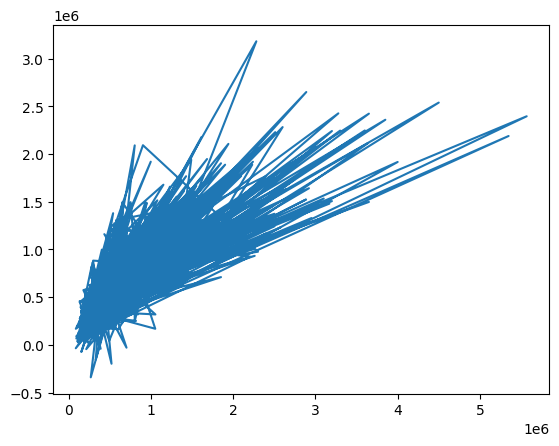

In [ ]:
plt.plot(y_test,y_predict)

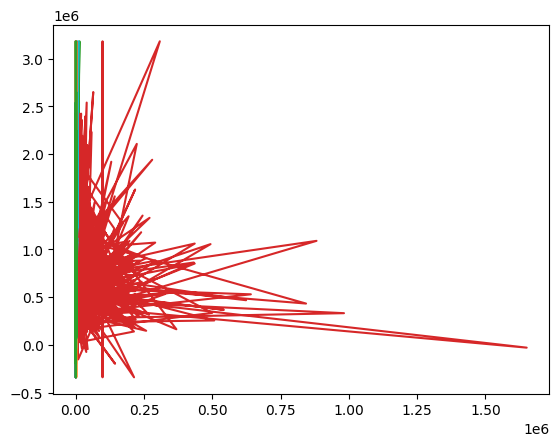

In [ ]:
plt.plot(X_test,y_predict)

In [ ]:
model.score(X,y)

0.652208892972985

In [ ]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862


In [ ]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103
21609,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146
21610,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144
21611,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027


In [ ]:
# Remove irrelevant columns
data_new=data.drop(columns=['bedrooms','sqft_lot','floors','waterfront','view','condition','sqft_basement','yr_built',	'yr_renovated','zipcode'],axis=1)

In [ ]:
data_new

,price,bathrooms,sqft_living,grade,sqft_above
0,221900,1.00,1180,7,1180
1,538000,2.25,2570,7,2170
2,180000,1.00,770,6,770
3,604000,3.00,1960,7,1050
4,510000,2.00,1680,8,1680
...,...,...,...,...,...
21608,360000,2.50,1530,8,1530
21609,400000,2.50,2310,8,2310
21610,402101,0.75,1020,7,1020
21611,400000,2.50,1600,8,1600


#Data_new Exploration and visualisation

In [ ]:
# Dependent/Independent Features(X/y)
X=data_new.iloc[:,1:].values
y=data.iloc[:,0].values

In [ ]:
X

array([[1.00e+00, 1.18e+03, 7.00e+00, 1.18e+03],
       [2.25e+00, 2.57e+03, 7.00e+00, 2.17e+03],
       [1.00e+00, 7.70e+02, 6.00e+00, 7.70e+02],
       ...,
       [7.50e-01, 1.02e+03, 7.00e+00, 1.02e+03],
       [2.50e+00, 1.60e+03, 8.00e+00, 1.60e+03],
       [7.50e-01, 1.02e+03, 7.00e+00, 1.02e+03]])

In [ ]:
y

array([221900, 538000, 180000, ..., 402101, 400000, 325000])

In [ ]:
# data_new spliting in Training & Testing (80% Training & 20$  Testing)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_predict=model.predict(X_test)

In [ ]:
y_predict

array([ 549019.23171482,  752023.52763064, 1174251.03100294, ...,
        604209.92933538,  597149.16742317,  627951.71458773])

In [ ]:
y_test

array([ 365000,  865000, 1038000, ...,  285000,  605000,  356500])

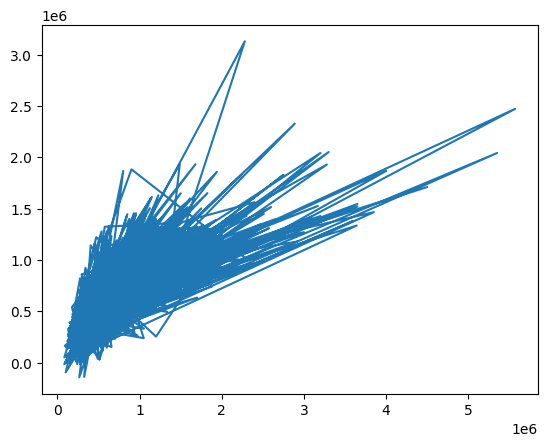

In [ ]:
plt.plot(y_test,y_predict)

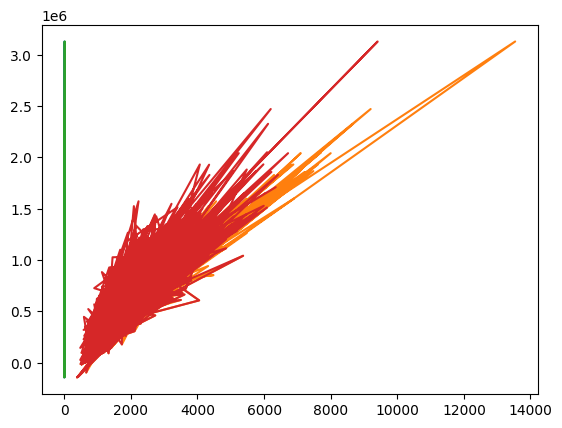

In [ ]:
plt.plot(X_test,y_predict)

Metrics Evaluation

In [ ]:
# Model Accuracy
model.score(X,y)

0.5434787864494336

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score

In [ ]:
model.coef_


array([-3.34139693e+04,  2.52300973e+02,  1.12270992e+05, -7.77290225e+01])

In [ ]:
model.intercept_

-635331.2105816824

In [ ]:
r2=r2_score(y_test,y_predict)

In [ ]:
r2

0.5474386197329255

In [ ]:
import statsmodels.api as sm

In [ ]:

model = sm.OLS(y_train,X_train).fit()

In [ ]:
model

In [ ]:
prediction=model.predict(X_test)

In [ ]:
prediction

array([536061.74585795, 761063.76317016, 997733.95437295, ...,
       622457.24830419, 599804.358688  , 657885.19104677])

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.843
Model:                            OLS   Adj. R-squared (uncentered):              0.843
Method:                 Least Squares   F-statistic:                          2.312e+04
Date:                Wed, 07 Feb 2024   Prob (F-statistic):                        0.00
Time:                        05:40:56   Log-Likelihood:                     -2.3992e+05
No. Observations:               17290   AIC:                                  4.798e+05
Df Residuals:                   17286   BIC:                                  4.799e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3.371e+04   3967.511     -8.495      0.000   -4.15e+04   -2.59e+04
x2           292.3373      4.988     58.612      0.000     282.561     302.114
x3          9083.0895   1011.746      8.978      0.000    7099.965    1.11e+04
x4           -31.8378      5.007     -6.358      0.000     -41.653     -22.023
==============================================================================
Omnibus:                    13370.843   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           693982.919
Skew:                           3.268   Prob(JB):                         0.00
Kurtosis:                      33.341   Cond. No.                     6.11e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Conclusion :**
Our model is not accurate base of r_square, mase & mae values are near zero. we can try to fit our dataset into polynomial regression model.
Thank



